In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [24]:
prod_per_year = df.groupby(["year"], as_index=False).mean()
prod_per_year.head()


,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,60953.488372,69.953488,5.105093e+06,1.873605e+06,0.832558,3.397465e+06
1,1999,61325.581395,65.465116,4.706674e+06,1.823023e+06,0.804186,2.875744e+06
2,2000,60558.139535,67.581395,5.106000e+06,1.975721e+06,0.791395,3.059721e+06
3,2001,57772.727273,64.545455,4.221545e+06,1.471909e+06,0.911818,3.006409e+06
4,2002,58295.454545,66.795455,3.892386e+06,8.903864e+05,1.371364,5.165955e+06


In [26]:
X = prod_per_year["year"]
print(X)
X = X.values.reshape(-1,1)

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64


In [28]:
y = prod_per_year["totalprod"]

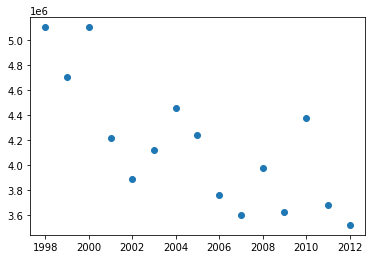

In [38]:
plt.scatter(X, y)
plt.show()

In [34]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
predict = regr.predict(X)
print(regr.coef_)
print(regr.intercept_)


[-88303.18915238]
181208083.10732982


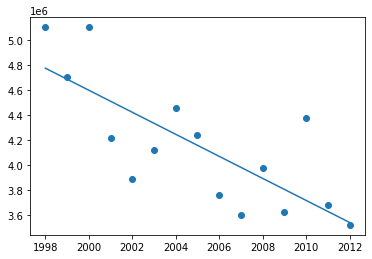

In [37]:
plt.scatter(X, y)
plt.plot(X, predict)
plt.show()

In [47]:
X_future = np.array(range(2013, 2051))
print(X_future)
X_future = X_future.reshape(-1, 1)
print(X_future)


[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050]
[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]
 [2050]]


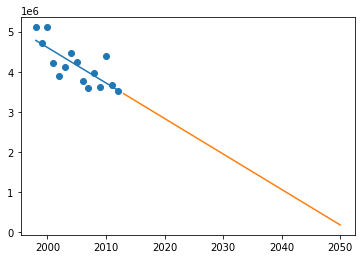

In [52]:
future_predict = regr.predict(X_future)
plt.scatter(X, y)
plt.plot(X, predict)
plt.plot(X_future, future_predict)
plt.show()